In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Scaling
from sklearn.neighbors import KNeighborsClassifier # Algorithm
from sklearn.metrics import confusion_matrix, accuracy_score # Evaluation
import seaborn as sns # Plotting

In [2]:
df1 = pd.read_csv('Diabetes data.txt')
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# x1 - 57
# y1 - 170
# x2 - 0
# y2 - 0

# (x2 - x1) ^ 2 
# (y2 - y1) ^ 2

((57 * 57) + (170 * 170)) ** 0.5

179.30142219179413

In [14]:
32149 ** 0.5

179.30142219179413

In [15]:
df1[df1['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

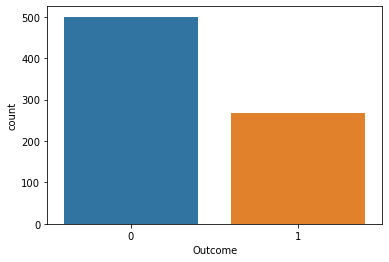

In [16]:
sns.countplot(x = 'Outcome', data = df1)

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

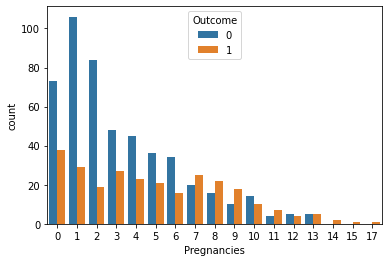

In [17]:
sns.countplot(x = 'Pregnancies', hue = 'Outcome', data = df1)

In [3]:
len(df1[df1['Glucose'] == 0])

5

In [4]:
len(df1[df1['BloodPressure'] == 0])

35

In [5]:
len(df1[df1['SkinThickness'] == 0])

227

In [6]:
len(df1[df1['BMI'] == 0])

11

In [7]:
len(df1[df1['Insulin'] == 0])

374

In [8]:
zero_columns = ['Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [9]:
df1['BloodPressure'].mean()

69.10546875

In [10]:
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [11]:
for column in zero_columns:#with 0 distance value et affected....replace with mean()
    mean = df1[column].mean() # skipna = True
    df1[column] = df1[column].replace(0, mean)

In [12]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df1.iloc[:,:-1].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000


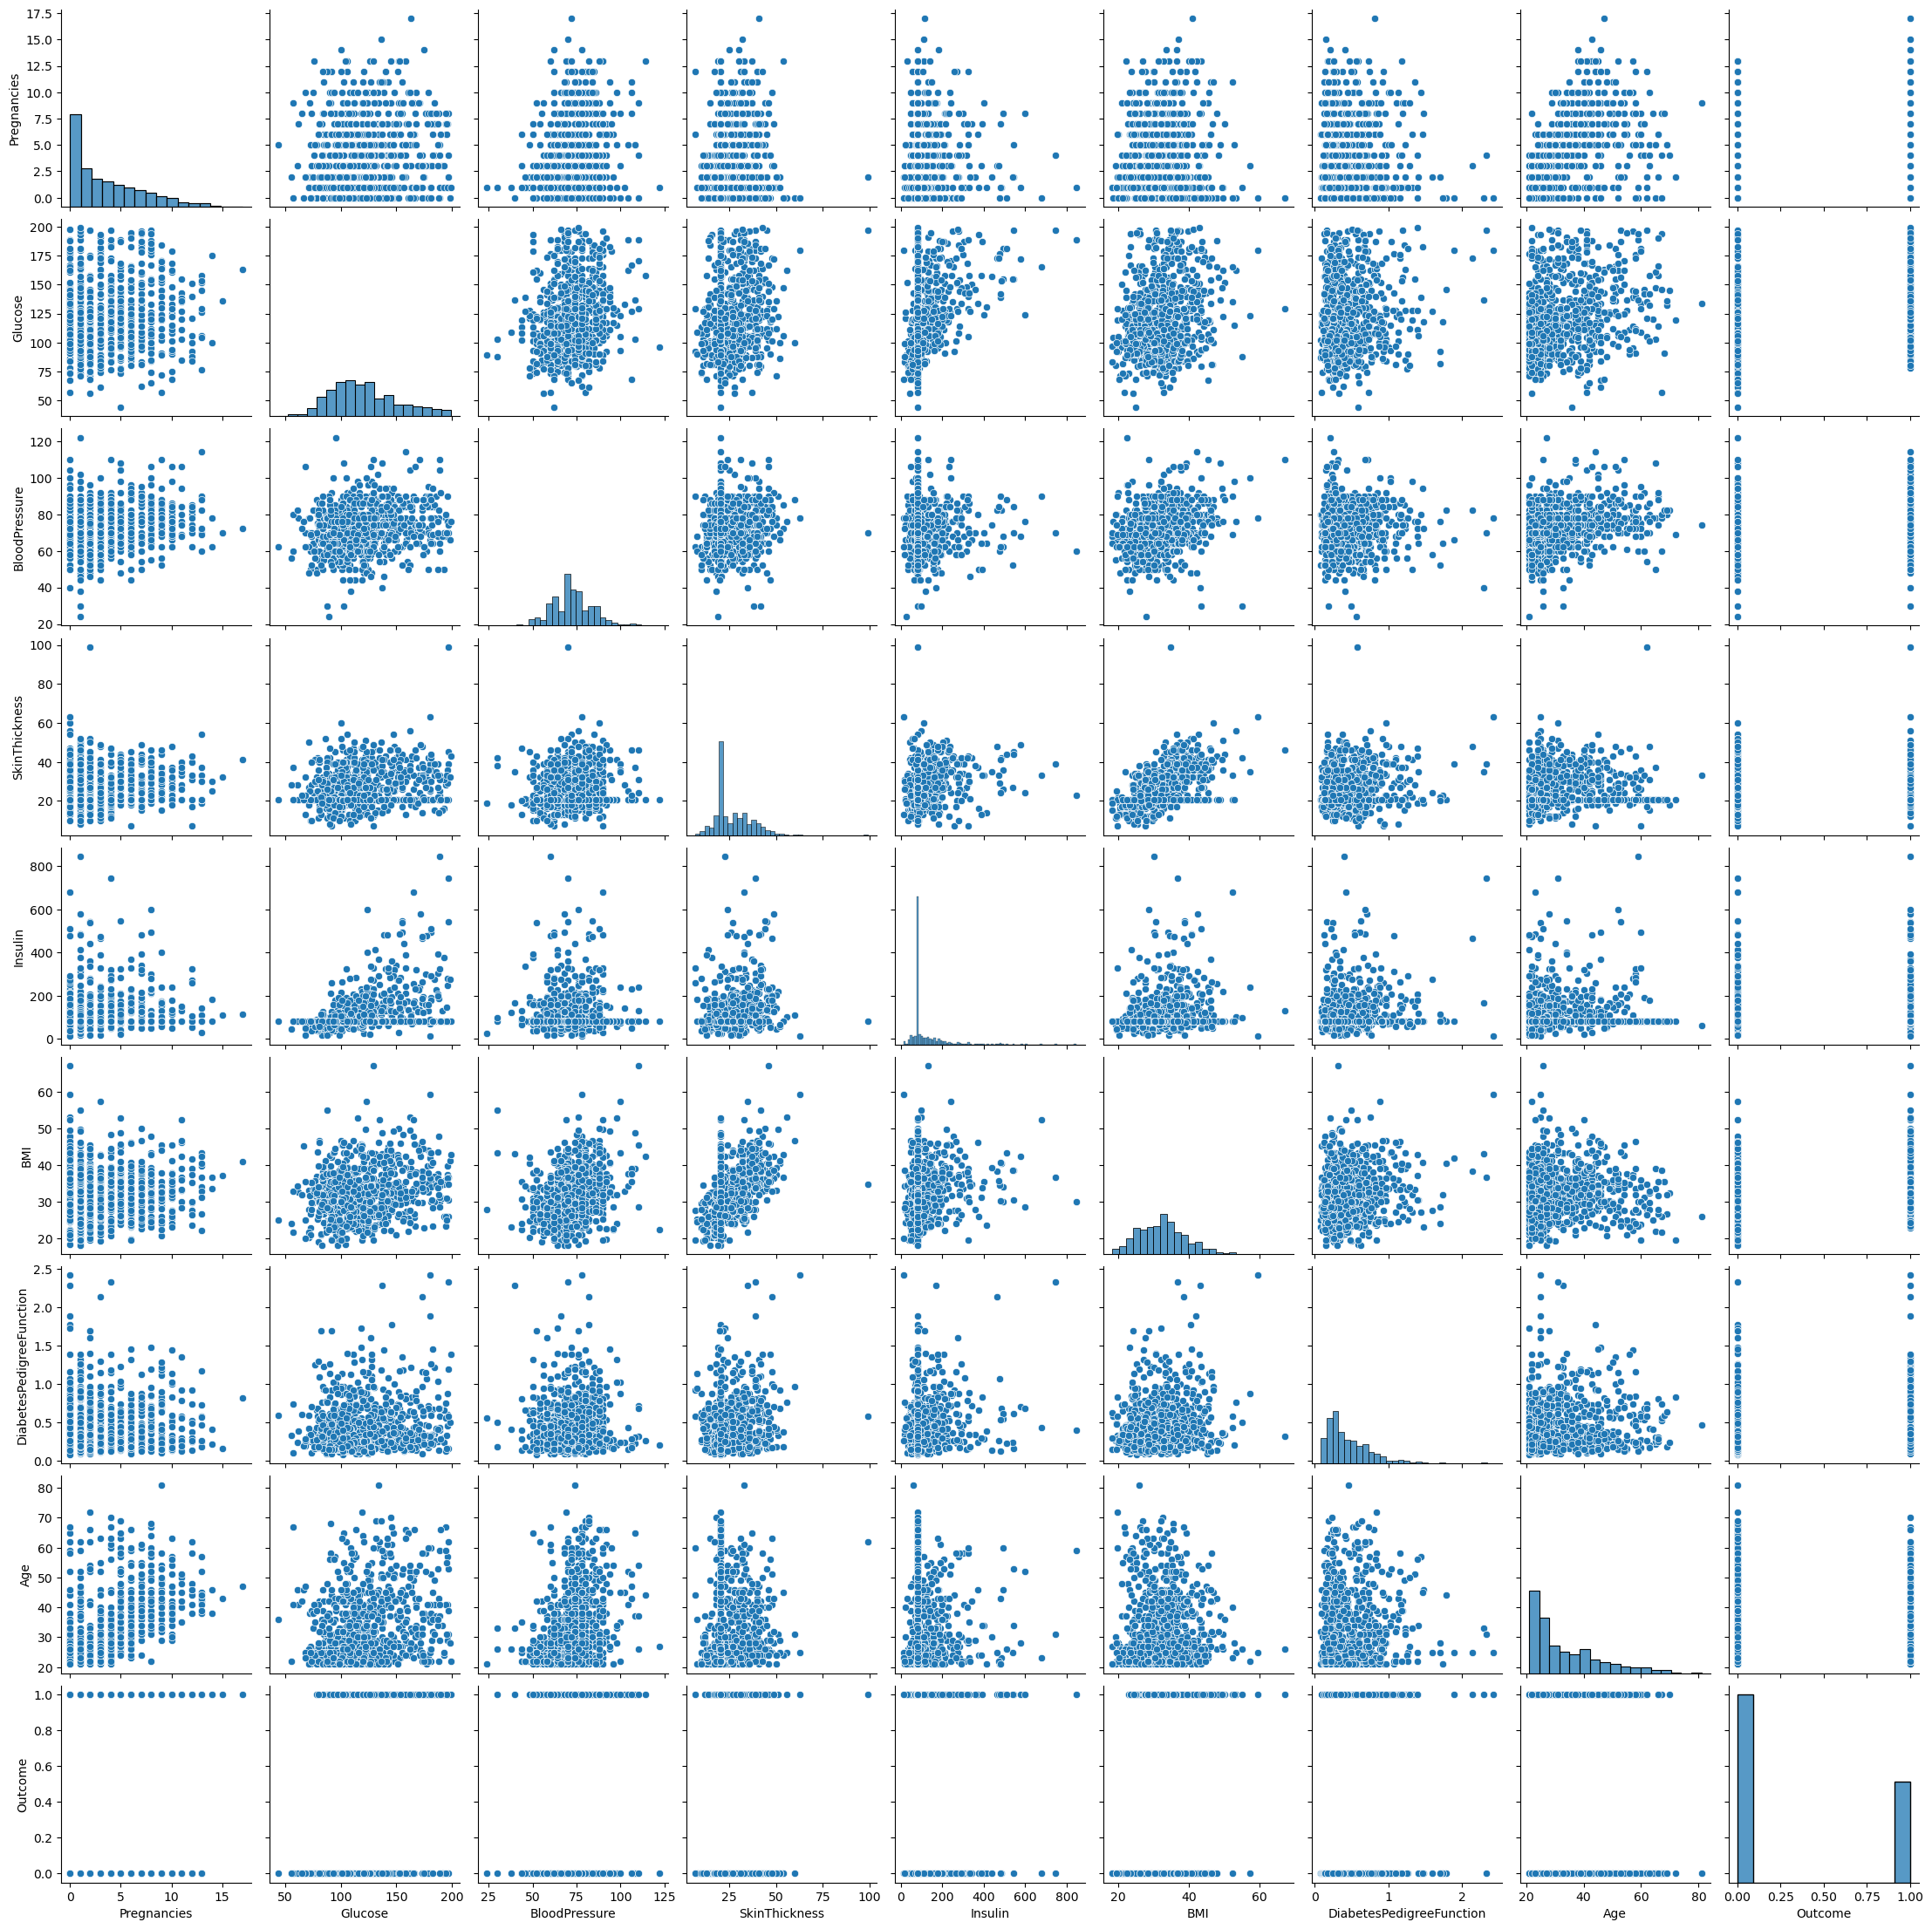

In [14]:
import matplotlib.pyplot as plt
sns.pairplot(df1)
plt.savefig('Mypairplot.png')

In [ ]:
pwd

# splitting the data

In [15]:
x = df1.drop('Outcome', axis = 1) # independent variable
y = df1['Outcome'] # dependent variable

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.20)

In [17]:
len(X_train),len(Y_test)

(614, 154)

In [20]:
from math import sqrt#calculating k value
sqrt(len(df1)), sqrt(len(Y_test)) # Either we will go with 11 or 13

(27.712812921102035, 12.409673645990857)

# scaling

* Any algorithm that calculates distance or assumes normality,
  scale the features

In [34]:
df1.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50,1


In [21]:
import warnings
warnings.filterwarnings('ignore')
scale = StandardScaler()#scaling always done on dependent variable
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [22]:
X_test

array([[ 1.23827175e+00, -7.04704037e-01,  1.11477730e-01, ...,
         9.87728995e-01,  5.16516314e-01,  9.81513467e-01],
       [ 1.23827175e+00, -1.58787644e-02,  1.26002027e+00, ...,
        -5.92540612e-01, -6.60951446e-01, -8.98945391e-01],
       [-1.03866974e+00,  1.94727326e+00, -1.22848856e+00, ...,
         2.98156803e-01,  1.72034529e+00, -9.88491051e-01],
       ...,
       [ 6.69036381e-01, -3.25850137e-01, -8.45641050e-01, ...,
         2.40692453e-01, -6.58022422e-01, -7.19854071e-01],
       [ 6.69036381e-01, -6.01380246e-01, -6.54217294e-01, ...,
        -1.18155019e+00, -6.90241689e-01, -2.72125772e-01],
       [ 1.23827175e+00, -8.76910355e-01, -7.99460263e-02, ...,
         6.14210724e-01,  1.00804082e-03,  2.23515270e+00]])

# The below code ends up in error

In [23]:
Y_train = scale.fit_transform(Y_train)
Y_test = scale.fit_transform(Y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# model


In [24]:
# Calling the model
classifier = KNeighborsClassifier(n_neighbors = 13,  metric='euclidean')
# k = 27, 11, 13
# Fitting the data
classifier.fit(X_train,Y_train)
# Predciting the values
y_pred = classifier.predict(X_test)
# y_pred

In [25]:
# classifier.predict(new_data)

In [26]:
df1.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31,0


In [27]:
classifier.predict([[3,167,95,31,123,45.4,0.5,42]])

array([1], dtype=int64)

In [28]:
classifier.predict([[1,85.0,66.0,29.0, 79.799479,26.6,0.351,31]])

array([1], dtype=int64)

# evaluation

In [29]:
cm = confusion_matrix(Y_test,y_pred)
print(cm)

[[91 10]
 [24 29]]


In [30]:
(86+26)/(86+13+29+26)

0.7272727272727273

In [31]:
print(accuracy_score(Y_test,y_pred))

0.7792207792207793


In [32]:
k = 13 ---> 0.753
k = 11 ---> ?????
k = 27 ---> ?????

SyntaxError: invalid syntax (2510985876.py, line 1)